In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset = pd.read_csv('finished_processed.csv')
print(dataset.keys())
dataset.drop(['backers_count', 'usd_pledged'], axis=1, inplace=True)
target = dataset['state']
features = dataset.drop(['state', 'is_starrable'], axis=1)

categorical_keys = ['category' 'country', 'currency', 'disable_communication', 'is_starrable', 
                    'spotlight', 'staff_pick', 'location']
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
features = features.apply(lb.fit_transform)

Index(['backers_count', 'category', 'country', 'creator', 'currency',
       'disable_communication', 'goal', 'is_starrable', 'staff_pick', 'state',
       'usd_pledged', 'location', 'blurb_length', 'duration'],
      dtype='object')


In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)
print(X_train.shape)

(130367, 10)


In [6]:
rf = RandomForestClassifier(n_estimators = 100, oob_score = True, random_state=1)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [7]:
predicted = rf.predict(X_test)
print(accuracy_score(y_test, predicted))
print(1 - rf.oob_score_)
importances = [(features.keys()[i], rf.feature_importances_[i]) for i in range(len(features.keys()))]
print(importances)

0.770342415317
0.238143088358
[('category', 0.24415727074407961), ('country', 0.014192148389468084), ('creator', 0.15635710710854137), ('currency', 0.012634514346658385), ('disable_communication', 0.0027165934725033834), ('goal', 0.18032041861845419), ('staff_pick', 0.074627419672873924), ('location', 0.139621324374745), ('blurb_length', 0.094940730843242949), ('duration', 0.080432472429432966)]


In [8]:
droppable = ['disable_communication']
features.drop(droppable, inplace=True, axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=1)
rf.fit(X_train, y_train)
predicted = rf.predict(X_test)
print(accuracy_score(y_test, predicted))
print(1 - rf.oob_score_)
importances = [(features.keys()[i], rf.feature_importances_[i]) for i in range(len(features.keys()))]
print(importances)

0.772183357879
0.236961807819
[('category', 0.24817818198816352), ('country', 0.014260179583808225), ('creator', 0.15663892969717513), ('currency', 0.012600284873291916), ('goal', 0.17977911472045552), ('staff_pick', 0.075033179618054252), ('location', 0.13874945289648294), ('blurb_length', 0.093819548573895531), ('duration', 0.080941128048673108)]


In [10]:
%%capture --no-stdout
from collections import OrderedDict

min_est = 10
max_est = 100

max_features = [0.2, 0.33, 0.5, 0.8, "sqrt", "log2", None]

error_scores = OrderedDict((l, []) for l in max_features)

for mf in max_features:
    
    rf_test = RandomForestClassifier(n_estimators = min_est, max_features = mf, oob_score = True, random_state = 1,
                                     warm_start = True, n_jobs = -1)
    for i in range(min_est, max_est + 1, 5):
        rf_test.set_params(n_estimators = i)
        rf_test.fit(X_train, y_train)
        oob_error = 1 - rf_test.oob_score_
        error_scores[mf].append((i, oob_error))
        print(str(mf) + ": " + str(i) + ", " + str(oob_error))

0.2: 10, 0.327306757078
0.2: 15, 0.308390927152
0.2: 20, 0.299293532873
0.2: 25, 0.293080304065
0.2: 30, 0.288071367754
0.2: 35, 0.285056801184
0.2: 40, 0.281351875858
0.2: 45, 0.279388188729
0.2: 50, 0.277140687444
0.2: 55, 0.273044558822
0.2: 60, 0.271970667424
0.2: 65, 0.269815213973
0.2: 70, 0.268687628004
0.2: 75, 0.2680049399
0.2: 80, 0.26716883874
0.2: 85, 0.267360605061
0.2: 90, 0.265465953807
0.2: 95, 0.264760253745
0.2: 100, 0.26399318846
0.33: 10, 0.310768829535
0.33: 15, 0.291147299547
0.33: 20, 0.281022037786
0.33: 25, 0.275207682926
0.33: 30, 0.270919787983
0.33: 35, 0.268626262781
0.33: 40, 0.266248360398
0.33: 45, 0.264277002616
0.33: 50, 0.26173034587
0.33: 55, 0.26008882616
0.33: 60, 0.258516342326
0.33: 65, 0.257097271549
0.33: 70, 0.256176793207
0.33: 75, 0.255478763798
0.33: 80, 0.255563140979
0.33: 85, 0.254535273497
0.33: 90, 0.253561100585
0.33: 95, 0.2527940353
0.33: 100, 0.252026970015
0.5: 10, 0.282479461827
0.5: 15, 0.268096987735
0.5: 20, 0.257634217248
0.5

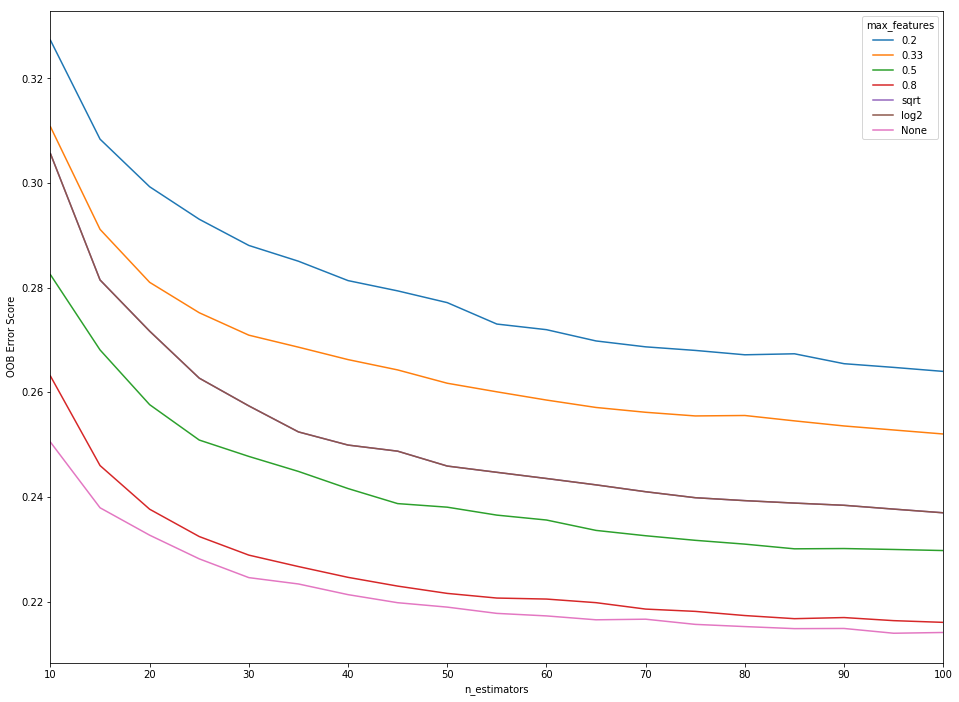

In [11]:
plt.figure(figsize=(16,12))
for mf, rf_err in error_scores.items():
    xs, ys = zip(*rf_err)
    plt.plot(xs, ys, label=str(mf))
plt.xlim(min_est, max_est)
plt.xlabel("n_estimators")
plt.ylabel("OOB Error Score")
plt.legend(title="max_features", loc="upper right")
plt.show();

In [13]:
rf_optimized = RandomForestClassifier(n_estimators = 200, max_features = None, oob_score = True, random_state = 1,
                                      warm_start = True, n_jobs = -1)
rf_optimized.fit(X_train, y_train)
predicted = rf_optimized.predict(X_test)
print(accuracy_score(y_test, predicted))
print(1 - rf_optimized.oob_score_)
importances = [(features.keys()[i], rf_optimized.feature_importances_[i]) for i in range(len(features.keys()))]
print(importances)

0.790408689249
0.211433875137
[('category', 0.29871681959734142), ('country', 0.012268441857467836), ('creator', 0.14035952132341462), ('currency', 0.013425421730441433), ('goal', 0.18258107947099275), ('staff_pick', 0.069760002200311949), ('location', 0.12297684852734689), ('blurb_length', 0.081942020657326087), ('duration', 0.077969844635356653)]


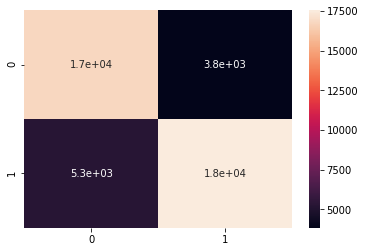

In [14]:
from sklearn.metrics import confusion_matrix

cfmtx = confusion_matrix(y_test, predicted)
sns.heatmap(cfmtx, annot=True)

AttributeError: ("'numpy.int64' object has no attribute 'split'", 'occurred at index 0')